# Getting Started

In [1]:
import jax
import augmax
import imageio
import matplotlib.pyplot as plt

input_image = imageio.imread('https://github.com/khdlr/augmax/raw/master/docs/teddy.png')

def show_image_pair(img1, img2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1)
    ax[0].axis('off')
    
    ax[1].imshow(img2)
    ax[1].axis('off')

## A Simple Augmentation

Augmentations are composed using `augmax.Chain`.

An important difference from other frameworks is that we need to keep track of our own PRNG state in `jax`. When augmenting your data with `augmax`, you therefore need to pass an `PRNGKey` along with your image.
The nice thing about this is that it is easy to get deterministic transformations. Whenever you pass a specific `PRNGKey` to an augmentation pipeline, the transformation will be the same.

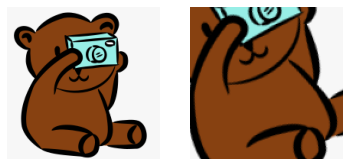

In [8]:
transform = augmax.Chain(
  augmax.RandomCrop(128),
  augmax.HorizontalFlip(),
  augmax.Rotate(),
)

rng = jax.random.PRNGKey(18)
transformed_image = transform(rng, input_image)

show_image_pair(input_image, transformed_image)

## `jit`ting an Augmentation Pipeline

Now that we managed to do that, let's try how well `augmax` works with `jax.jit`.

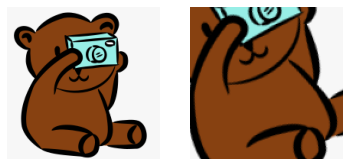

In [9]:
transformed_image = jax.jit(transform)(rng, input_image)
show_image_pair(input_image, transformed_image)

## Additional Data

Transforming additional data like segmentation masks or keypoints is easy. Simply specify `input_types` to your augmentation pipeline.

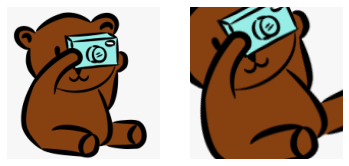

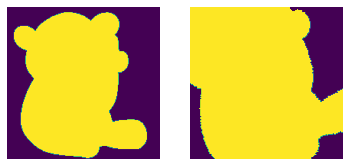

In [10]:
transform = augmax.Chain(
  augmax.RandomCrop(150),
  augmax.HorizontalFlip(),
  augmax.Rotate(),
  input_types = [augmax.InputType.IMAGE, augmax.InputType.MASK]
)

# Calculate a mock-up segmentation mask
input_mask = (input_image.mean(axis=2) < 246) | (input_image.mean(axis=2) > 248)

transformed_image, transformed_mask = transform(rng, input_image, input_mask)

show_image_pair(input_image, transformed_image)
show_image_pair(input_mask, transformed_mask)